#Method-1: Einstein notation implementation:



### Einstein sum convention

The following information is copied from the Author Tim Thomay under the license [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/)

source: [Tim Thomay writings](https://github.com/ubsuny/CompPhys/blob/main/ReviewPython/EinsteinNotation.ipynb)

Theoretical physicist like to invent notational conventions so that they don't have to write so much.
One example is Einsteins sum convention which removes the $\Sigma$ (sum) symbol from equations.

> Es  ist  deshalb moglich,  ohne  die  Klarheit  zu  beeintrachtigen,  die Summenzeichen  wegzulassen.  Dafür  führen wir  die  Vorschrift ein:  Tritt ein  Index in einem  Term  eines  Ausdruckes  zweimal auf so ist über ihn  stets zu  summieren, wenn  nicht ausdrücklich  das  Gegenteil  bemerkt  ist.

[Translation](https://translate.google.com/?sl=auto&tl=en&text=Es%20%20ist%20%20deshalb%20moglich%2C%20%20ohne%20%20die%20%20Klarheit%20%20zu%20%20beeintrachtigen%2C%20%20die%20Summenzeichen%20%20wegzulassen.%20%20Dafür%20%20führen%20wir%20%20die%20%20Vorschrift%20ein%3A%20%20Tritt%20ein%20%20Index%20in%20einem%20%20Term%20%20eines%20%20Ausdruckes%20%20zweimal%20auf%20so%20ist%20über%20ihn%20%20stets%20zu%20%20summieren%2C%20wenn%20%20nicht%20ausdrücklich%20%20das%20%20Gegenteil%20%20bemerkt%20%20ist.&op=translate)
source: [Die Grundlage der allgemeinen Relativitätstheorie, A. Einstein](https://doi.org/10.1002/andp.19163540702)

In [60]:
# Function to find the diagonal using Einstein summation notation
def diagonal(matrix):
    return np.einsum("ii->i", matrix)

# Unit test and time measurement
if __name__ == "__main__":
    # Create a sample 3x3 matrix
    matrix = np.array([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

    # Measure the execution time in microsecond
    start_time = int(time.time()* 1_000_000)
    diagonal_elements = diagonal(matrix)
    end_time = int(time.time()* 1_000_000)

    # Calculate the execution time in microsecond
    ein_time = end_time - start_time

    print("Diagonal elements:", diagonal_elements)
    print("Einstein summation execution time:", ein_time, "Microseconds")

Diagonal elements: [1 5 9]
Einstein summation execution time: 18 Microseconds


# Method-2: Naive Loop-Based Implementation:

In [61]:
import numpy as np
import time

def diagonal_elements(matrix):
    n = len(matrix)
    diagonal = []

    # Start measuring time for the loop
    start_time = int(time.time()* 1_000_000)

    for i in range(n):
        diagonal.append(matrix[i][i])

    # End measuring time for the loop in microsecond
    end_time = int(time.time()* 1_000_000)
    loop_execution_time = end_time - start_time   #This calculates the total time for executing this loop

    return diagonal, loop_execution_time

# Example Unit Test:
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]                # Replace with your matrix
diagonal, loop_time = diagonal_elements(matrix)
naive_time=loop_time
print("Diagonal elements:", diagonal)
print("Loop execution time:",naive_time, "Microseconds")

Diagonal elements: [1, 5, 9]
Loop execution time: 2 Microseconds


## Method-3: NumPy Implementation:

In [62]:
import numpy as np
import time

def diagonal_elements(matrix):
    # Start measuring time for the NumPy operation
    start_time = int(time.time()* 1_000_000)

    diagonal = np.diag(matrix)

    # End measuring time for the NumPy operation
    end_time = int(time.time()* 1_000_000)
    numpy_execution_time = end_time - start_time    #This calculates the total time for executing this loop

    return diagonal, numpy_execution_time

# Example Unit Test:
#matrix = np.random.rand(3,3)  # Replace with your matrix
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]

diagonal, numpy_time = diagonal_elements(matrix)
print("Diagonal elements:", diagonal)
print("NumPy execution time:", numpy_time,"Microseconds")


Diagonal elements: [1 5 9]
NumPy execution time: 40 Microseconds


# Method-4: TensorFlow Implementation (with GPU):

In [63]:
import tensorflow as tf
import time

def diagonal_elements(matrix):
    # Start measuring time for the TensorFlow operation
    start_time = int(time.time()* 1_000_000)

    with tf.device('/GPU:0'):
        diagonal = tf.linalg.diag_part(matrix)

    # End measuring time for the TensorFlow operation
    end_time = int(time.time()* 1_000_000)
    tensorflow_execution_time = end_time - start_time   #This calculates the total time for executing this loop

    return diagonal.numpy(), tensorflow_execution_time

# Example Unit Test:
#matrix = tf.constant(np.random.rand(3, 3), dtype=tf.float32)  # Replace with your matrix
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]

diagonal, tensor_time = diagonal_elements(matrix)
tensor_time
print("Diagonal elements:", diagonal)
print("TensorFlow execution time:", tensor_time, "Microseconds")


Diagonal elements: [1 5 9]
TensorFlow execution time: 499 Microseconds


# Time consumption comparison of different implementations

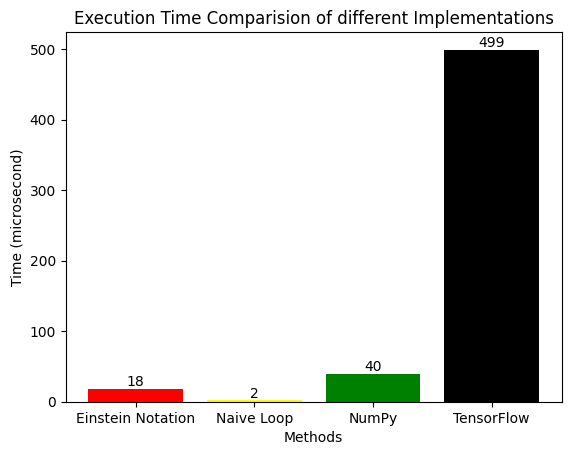

In [64]:
import matplotlib.pyplot as plt

# Create a list of element names and their values
elements = ["Einstein Notation","Naive Loop", "NumPy", "TensorFlow"]
values = [ein_time, naive_time, numpy_time,tensor_time]

# Create a bar chart of the element values
plt.bar(elements, values)

plt.bar(elements, values, color=["red", "yellow", "green","black"])


# Add values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Set the title, x-axis label, and y-axis label
plt.title("Execution Time Comparision of different Implementations")
plt.xlabel("Methods")
plt.ylabel("Time (microsecond)")

# Show the bar chart
plt.show()
